# 9、使用 Logistic 回归进行交叉验证分类

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
%%time

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

CPU times: user 174 ms, sys: 4.83 ms, total: 179 ms
Wall time: 178 ms


In [4]:
log_reg.score(X_test, y_test)

0.9555555555555556

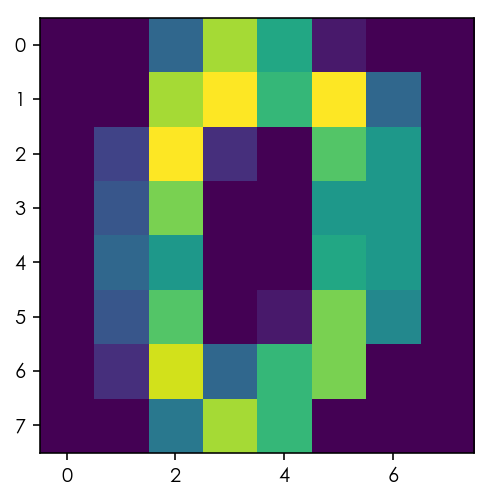

In [8]:
plt.imshow(X[0].reshape((8,8)))

下面使用交叉验证的方式进行逻辑回归训练。

In [11]:
%%time

from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV()
log_reg_cv.fit(X_train, y_train)

CPU times: user 4.97 s, sys: 46.5 ms, total: 5.01 s
Wall time: 5.04 s


In [12]:
log_reg_cv.score(X_test, y_test)

0.9644444444444444

默认是 10 折交叉验证，得到 10 个数，分别是在 10 份测试数据集上的评价结果。

> Array of C that maps to the best scores across every class. If refit is set to False, then for each class, the best C is the average of the C’s that correspond to the best scores for each fold. C_ is of shape(n_classes,) when the problem is binary.

In [13]:
log_reg_cv.C_

array([0.00599484, 0.00599484, 0.04641589, 0.35938137, 0.00599484,
       0.35938137, 0.35938137, 0.35938137, 0.00599484, 0.04641589])

---
参考资料
+ [scikit-learn 官方文档 3.2.4.1.5. sklearn.linear_model.LogisticRegressionCV API](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)